<Figure size 1152x576 with 0 Axes>

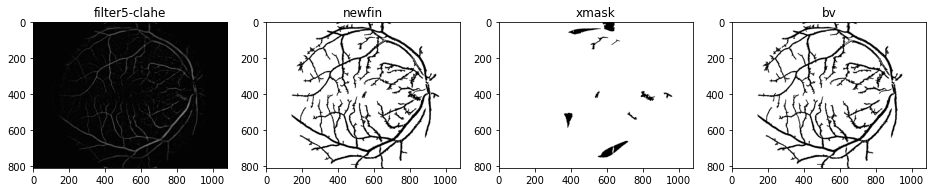

<Figure size 1152x576 with 0 Axes>

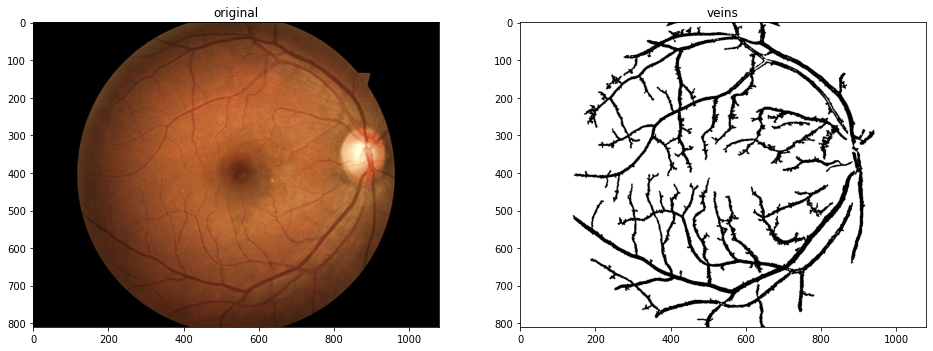

In [2]:
%matplotlib inline
#retinal vein detection _ ali bakhshi, 2020
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,8)
def blood_vessel(image):
    plt.figure(500)
    f, axarr = plt.subplots(1,4)
    
    b,g,r = cv2.split(image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    ceg = clahe.apply(g)#contrast improving
    #sequential filtering (3 times closing opening)
    r1 = cv2.morphologyEx(ceg, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
    R1 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
    r2 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
    R2 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
    r3 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
    R3 = cv2.morphologyEx(r3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)	
    filter4 = cv2.subtract(R3,ceg)
    filter5 = clahe.apply(filter4)
    axarr[0].imshow(cv2.cvtColor(filter5, cv2.COLOR_BGR2RGB))
    axarr[0].set_title("filter5-clahe")
    #cv2.imshow('f5',cv2.bitwise_not(f5))
        #noise removal
    ret,filter6 = cv2.threshold(filter5,8,255,cv2.THRESH_BINARY)#15,255
    mask = np.ones(filter5.shape[:2], dtype="uint8") * 255
    contours, hierarchy = cv2.findContours(filter6.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) <= 200:
            cv2.drawContours(mask, [cnt], -1, 0, -1)
    img = cv2.bitwise_and(filter5, filter5, mask=mask)
    ret,fin = cv2.threshold(img,8,255,cv2.THRESH_BINARY_INV)#15,255
    newfin = cv2.erode(fin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)
        # removing stains of unwanted shapes
    axarr[1].imshow(cv2.cvtColor(newfin, cv2.COLOR_BGR2RGB))
    axarr[1].set_title("newfin")
    eroded = cv2.bitwise_not(newfin)
    xmask = np.ones(imageIn.shape[:2], dtype="uint8") * 255
    xcontours, xhierarchy = cv2.findContours(eroded.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    
    for cnt in xcontours:
        shape = "unidentified"
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.04 * peri, False)
        if len(approx) > 4 and cv2.contourArea(cnt) <= 3000 and cv2.contourArea(cnt) >= 100:
            shape = "stain"	
        else:
            shape = "veins"
        if(shape=="stain"):
            cv2.drawContours(xmask, [cnt], -1, 0, -1)
    axarr[2].imshow(cv2.cvtColor(xmask, cv2.COLOR_BGR2RGB))
    axarr[2].set_title("xmask")
    finalImage = cv2.bitwise_and(eroded,eroded,mask=xmask)
    bv = cv2.bitwise_not(finalImage)
    axarr[3].imshow(cv2.cvtColor(bv, cv2.COLOR_BGR2RGB))
    axarr[3].set_title("bv")
    return bv

if __name__ == "__main__":	
    #pathFolder = "./data"
    #files = [i for i in os.listdir(pathFolder) if os.path.isfile(os.path.join(pathFolder,i)) and i.split('.')[1]!='png']
    #save = "./data/"
    path="/home/plasma/Desktop/00-dri"
    file_name="1.jpeg"
    imageIn = cv2.imread(path+'/'+file_name)
    bv = blood_vessel(imageIn)
    image = cv2.cvtColor(imageIn, cv2.COLOR_BGR2RGB)
    plt.figure()
    f, axarr = plt.subplots(1,2) 
    axarr[0].imshow(image)
    axarr[0].set_title("original")
    axarr[1].imshow(cv2.cvtColor(bv, cv2.COLOR_BGR2RGB))
    axarr[1].set_title("veins")
    #plt.imshow(image)
    #plt.imshow(cv2.cvtColor(bv, cv2.COLOR_BGR2RGB))
    #cv2.imshow('original',imageIn)
    #cv2.imshow('original',bv)
    #if not os.path.exists(save):
        #os.mkdir(save)
    #for file_name in files:
        #fileName = os.path.splitext(file_name)[0]
        #imageIn = cv2.imread(pathFolder+'/'+file_name)
        #cv2.imshow('original',image)
        #bv = blood_vessel(imageIn)
        #cv2.imwrite(save+fileName+".png",bv)
